In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import statsmodels.api as sm
from bioinfokit import visuz

#output all columns to display
pd.set_option("display.max_columns", None)

# load txt file wiht column headings, no header row
df = pd.read_csv('https://gist.github.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/field_names.txt'
                    ,header=None)
# see the content of the file
header = df.transpose()
#header
# output   

#load csv file with data, no header row
body = pd.read_csv('https://gist.github.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv'
                      ,header=None)

#Concatenate the Header dataframe wth the data body dataframe into new dataframe
data = pd.concat([header,body])

#Set row 0, as the header for the dataframe and reset the data frame index
data.columns = data.iloc[0]
data = data.iloc[1:].reset_index(drop=True)

#data.head()

#keep a copy of non converted data
rawData = data

#Explicit type cast to avoid data type issues with other library calls
data = data.convert_dtypes()

#If Malignent set as True, if Bengign set as false, implicitly sets Diagnosis column to bool data type
data['diagnosis'] = data['diagnosis'].map({'M': True, 'B': False})

#look at metadata and first 30 rows of data
#data.info()
#data.head(n=30)


In [2]:
#summary stats on dataset
data.describe()



,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


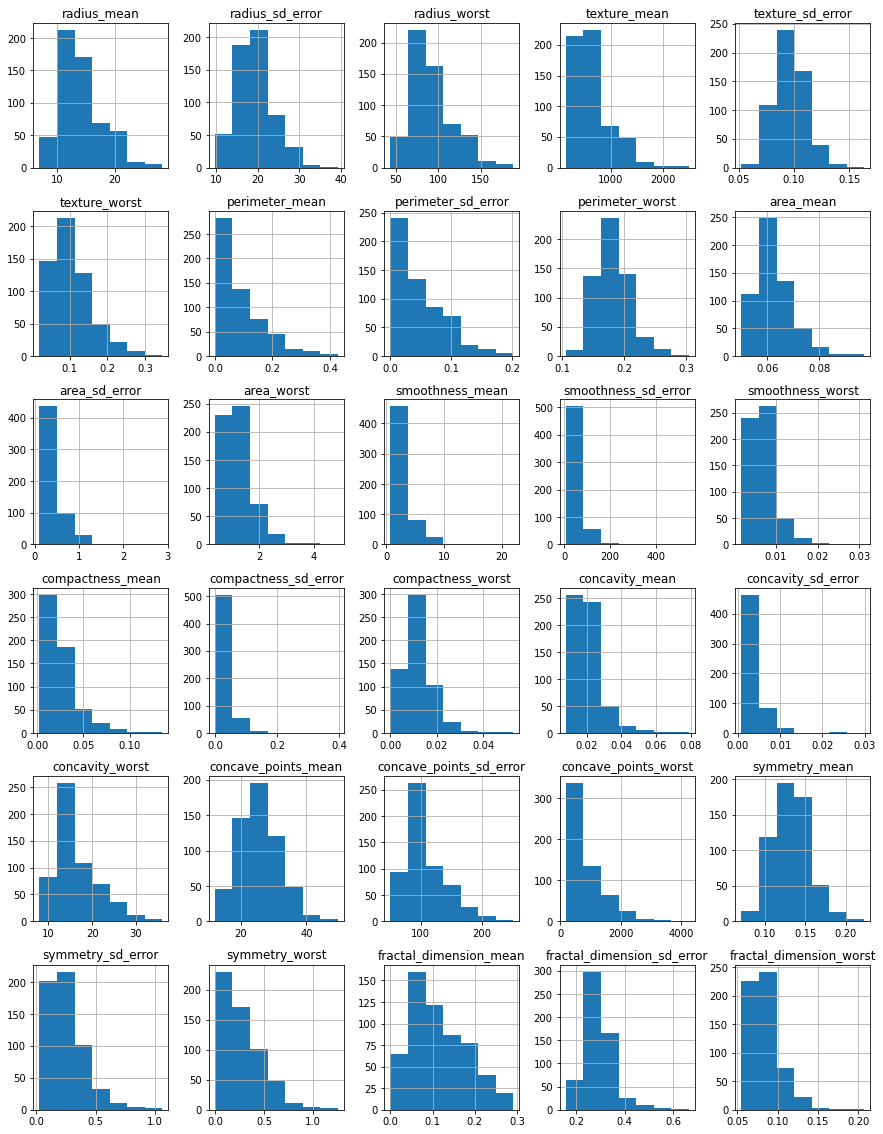

In [3]:
#remove ID column to exclude from histogram and box chart plots
boxData = data.drop(columns='ID')

#draw histrogram for all columns
boxData.hist(bins=7, figsize = (15,20))
plt.show()



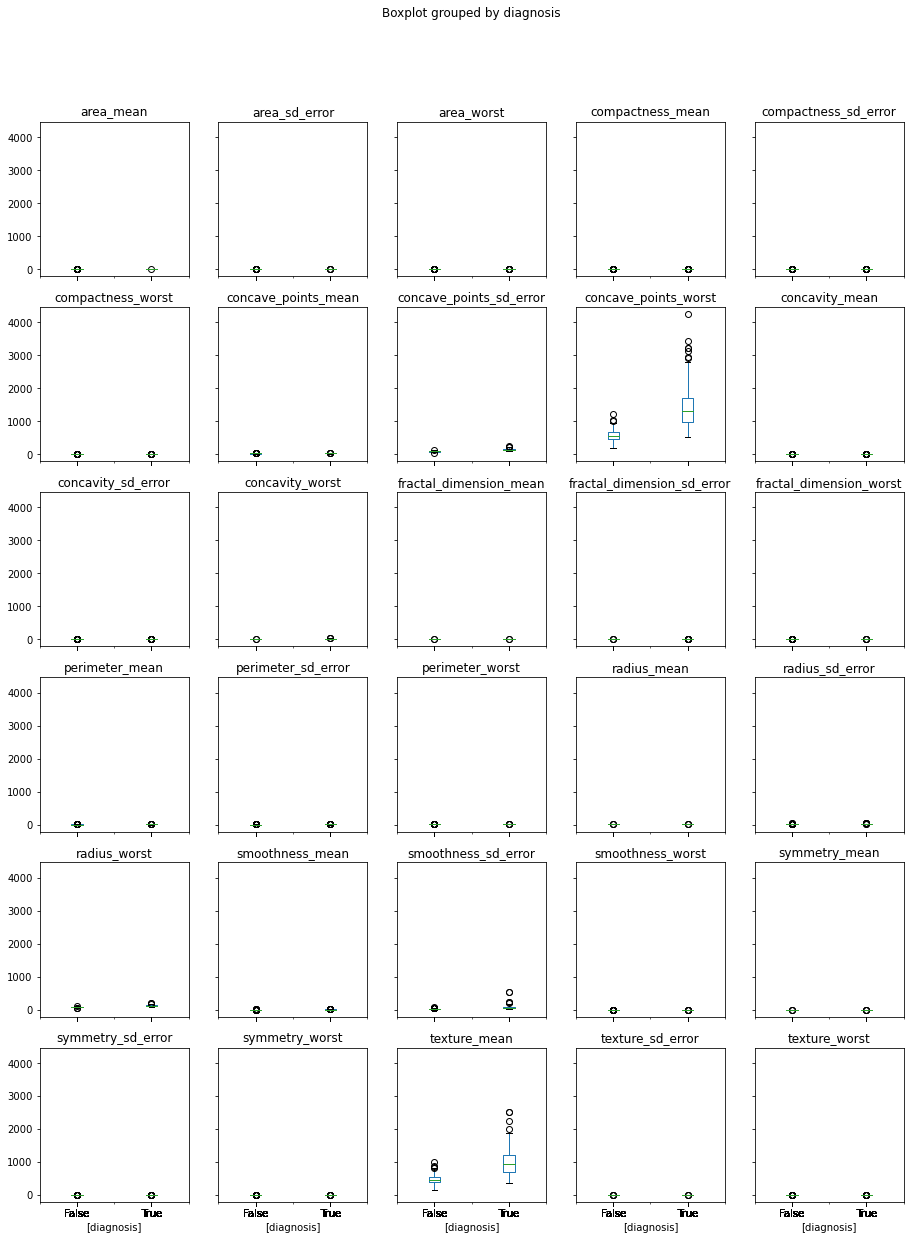

In [4]:
boxData.boxplot(by='diagnosis', figsize=(15,20), grid=False)
#plt.figure(figsize=(16, 200))
#draw boxplot for all columns
#sb.boxplot(data=boxData, orient='h')
plt.show()



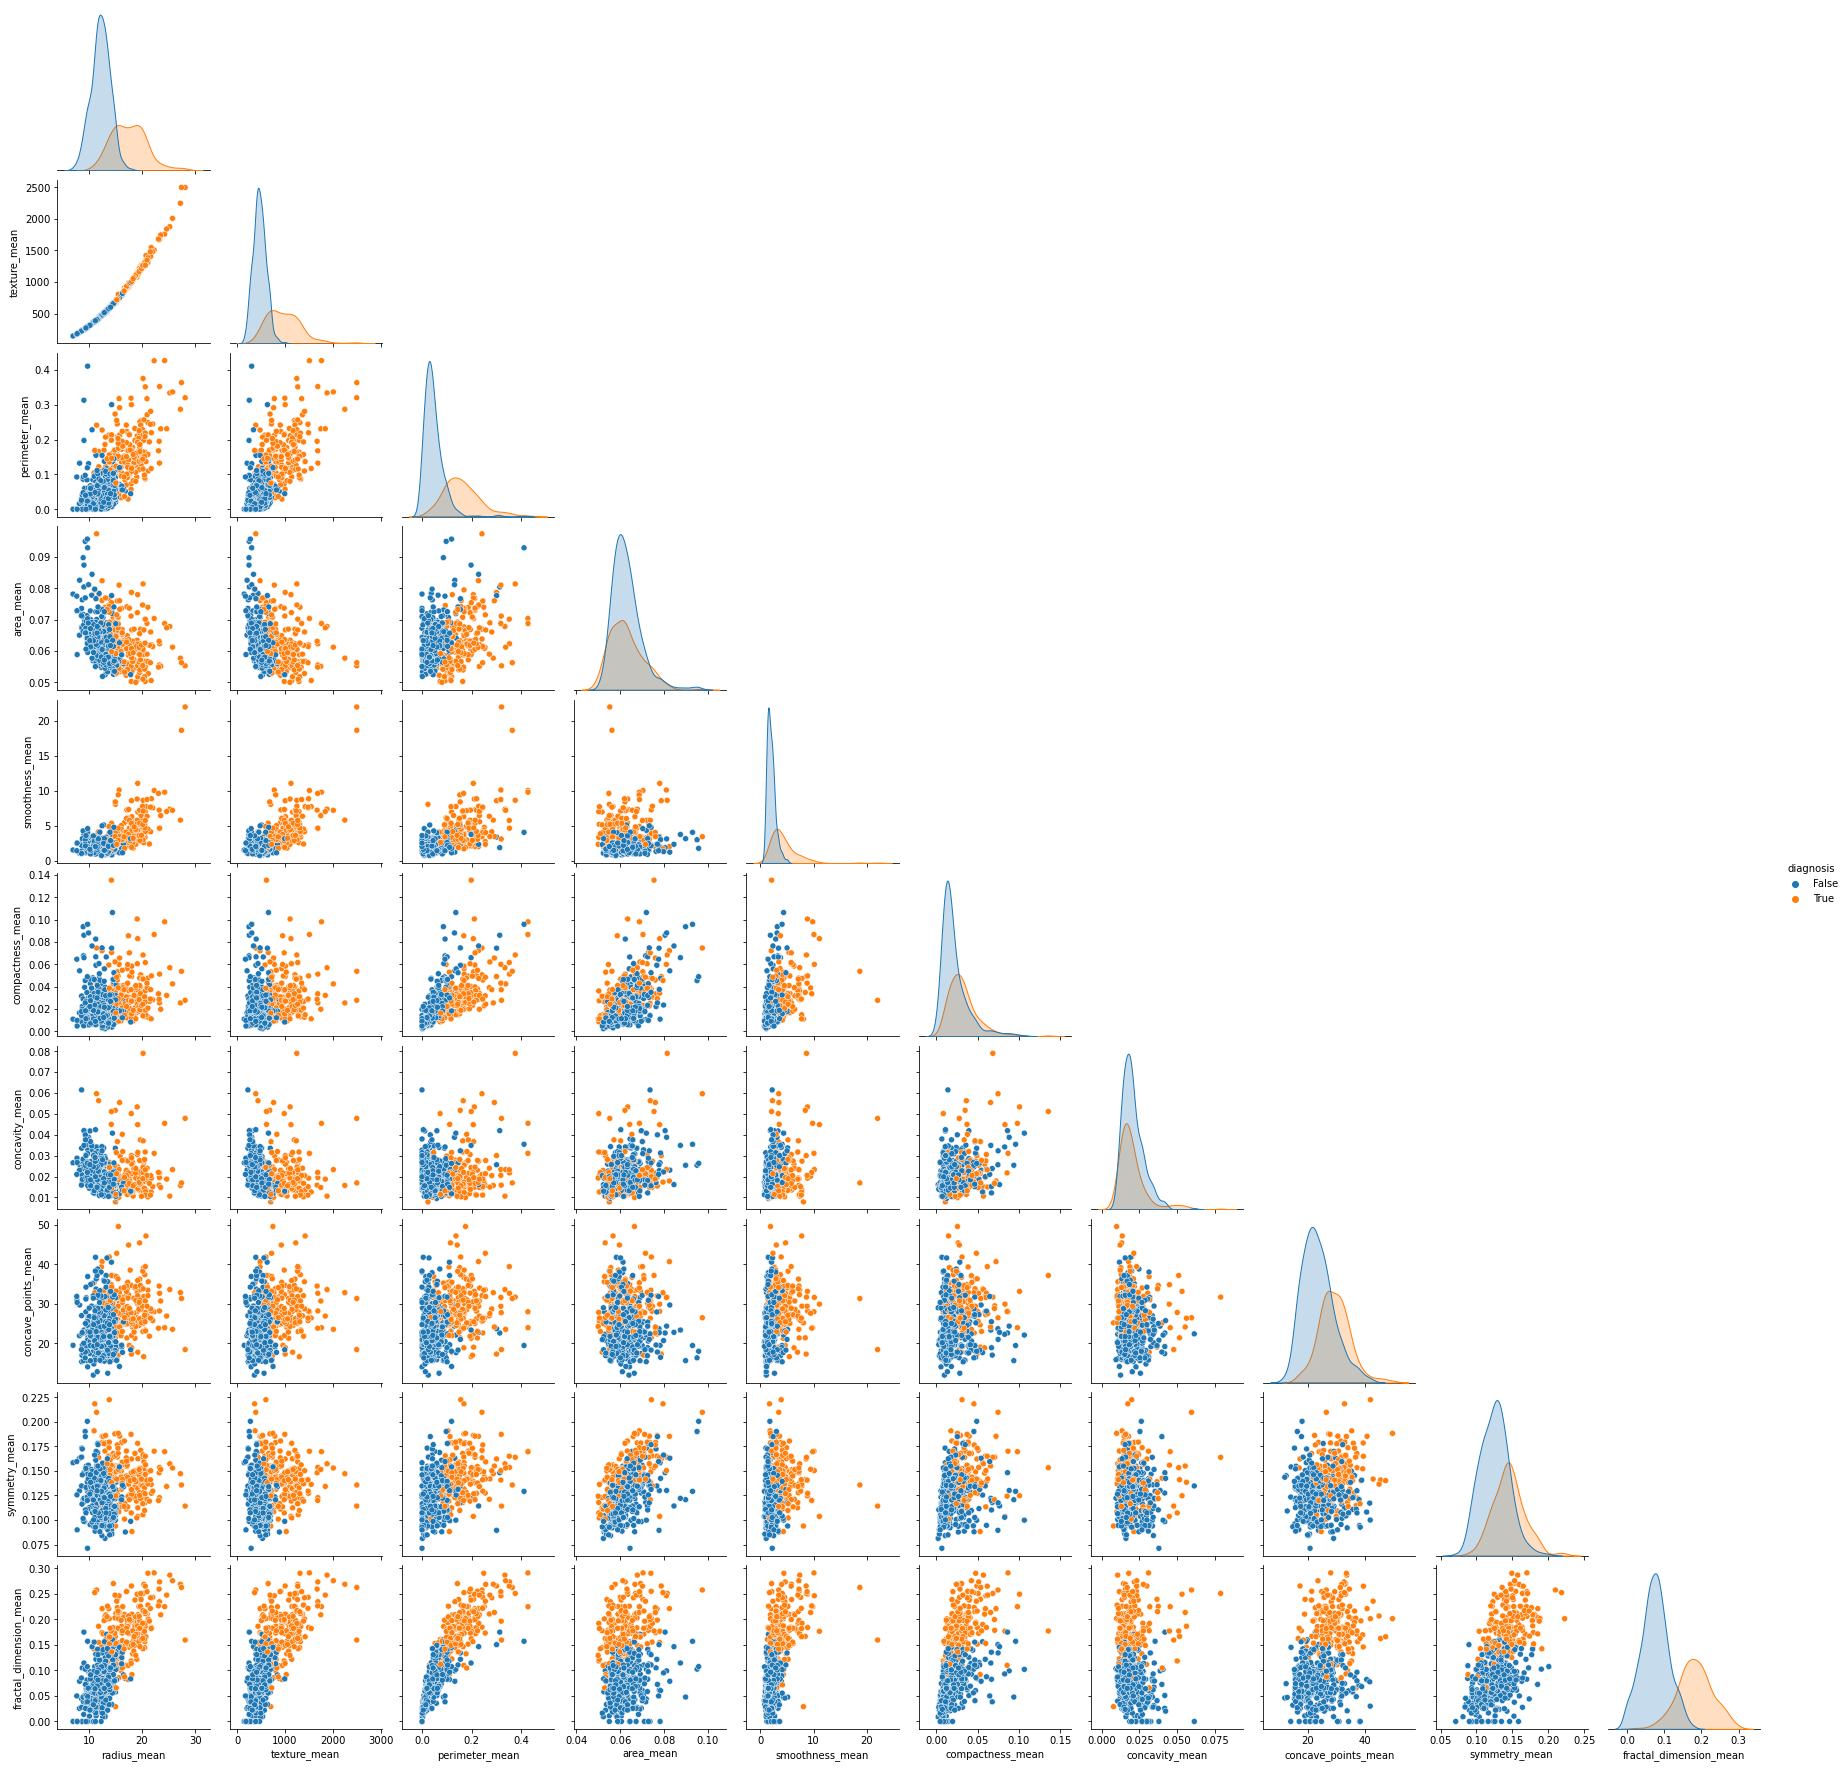

In [5]:
cols = ['diagnosis',
        'radius_mean',
        'texture_mean', 
        'perimeter_mean', 
        'area_mean',
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave_points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sb.pairplot(data=data[cols], hue='diagnosis', corner=True)

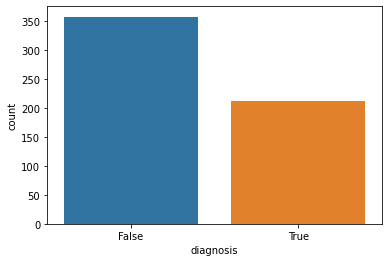

In [6]:
#draw bar chart of counts of Benign(false) vs Malignent(true) diagnosis
sb.countplot(x='diagnosis', data=data)
plt.show()
#data.hist(column='diagnosis)')

In [7]:
# create subset of Data to evaluate mean and median of smoothness and compactnessof Benign(False) 
# and Malignant(true) tumors
CompactSmoothData = data[["diagnosis","smoothness_mean","compactness_mean"]]

CompactSmoothData.groupby(['diagnosis']).mean()

,smoothness_mean,compactness_mean
diagnosis,,
False,2.000321,0.021438
True,4.323929,0.032281


In [8]:
CompactSmoothData.groupby(['diagnosis']).median()

,smoothness_mean,compactness_mean
diagnosis,,
False,1.851,0.01631
True,3.6795,0.02859


In [9]:
CompactSmoothData.describe()

,smoothness_mean,compactness_mean
count,569.000000,569.000000
mean,2.866059,0.025478
std,2.021855,0.017908
min,0.757000,0.002252
25%,1.606000,0.013080
50%,2.287000,0.020450
75%,3.357000,0.032450
max,21.980000,0.135400


array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

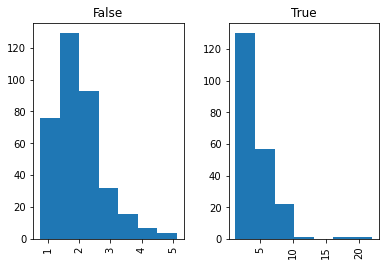

In [10]:
CompactSmoothData.hist(column='smoothness_mean',by='diagnosis', bins=7)

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

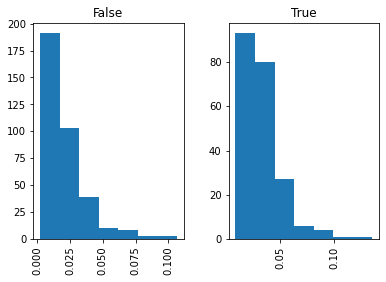

In [11]:
CompactSmoothData.hist(column='compactness_mean',by='diagnosis', bins=7)

In [12]:
#create subsets of sample data based on diagnosis: Malignent or Benign
malignent = CompactSmoothData[CompactSmoothData.diagnosis == True]
benign = CompactSmoothData[CompactSmoothData.diagnosis == False]
len(malignent), len(benign)

(212, 357)

Smoothness Mean


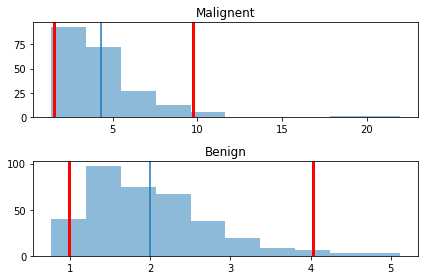

Compactness Mean


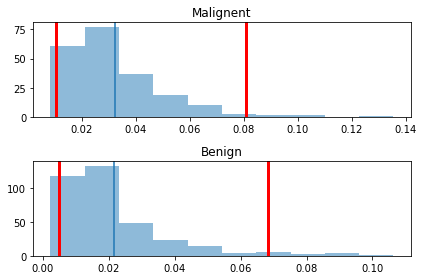

In [13]:
def plot_hist(x, p=5):
 # Plot the distribution and mark the mean
 plt.hist(x, alpha=.5)
 plt.axvline(x.mean())
 # 95% confidence interval 
 plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
 plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
 
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
 # Create a single sequence of bins to be shared across both
 # distribution plots for visualization consistency.
 combined = pd.concat([a, b])
 breaks = np.linspace(
 combined.min(), 
 combined.max(), 
 num=nbins+1)
 plt.subplot(2, 1, 1)
 plot_hist(a)
 plt.title(a_label)
 
 plt.subplot(2, 1, 2)
 plot_hist(b)
 plt.title(b_label)
 
 plt.tight_layout()

print( "Smoothness Mean")
plot_dists(malignent.smoothness_mean, benign.smoothness_mean, 5, a_label='Malignent', b_label='Benign')
plt.show()

print( "Compactness Mean")
plot_dists(malignent.compactness_mean, benign.compactness_mean, 10, a_label='Malignent', b_label='Benign')
plt.show()

Smoothness mean


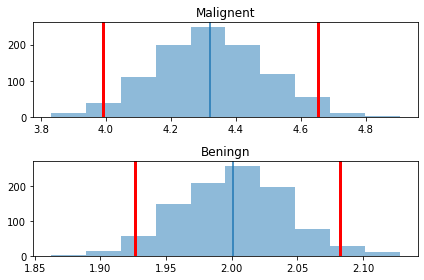

compactness mean


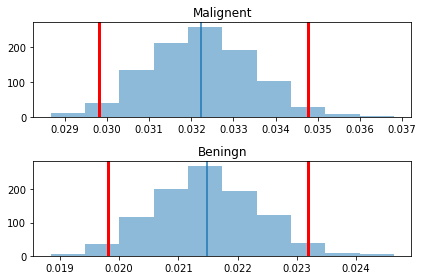

'\nbenign_bootstrap_means = pd.Series([\n benign.sample(frac=1, replace=True).smoothness_mean.mean()\n for i in range(n_replicas)])\n\nmalignent_bootstrap_means = pd.Series([\n malignent.sample(frac=1, replace=True).smoothness_mean.mean()\n for i in range(n_replicas)])\n\nprint("Smoothness mean")\nplot_dists(malignent_bootstrap_means, benign_bootstrap_means, \n nbins=80, a_label=\'Malignent\', b_label=\'Beningn\')\nplt.show()\n'

In [14]:
#Bootstrap function - function executes dynamic code based on passed in string parameters
def bootstrap_Sample(n_replicas, sample_dataFrame, sample_measure):
    loc = {}
    my_code ='''df = pd.Series([
     ''' + str(sample_dataFrame) + '''.sample(frac=1, replace=True).''' + str(sample_measure) + '''.mean()
     for i in range(''' + str(n_replicas) + ''')])'''
    #print(my_code)
    exec(my_code, globals(), loc)
    return loc['df']


#Smoothness bootstrap
benign_bootstrap_means = bootstrap_Sample('1000','benign','smoothness_mean')
malignent_bootstrap_means = bootstrap_Sample('1000','malignent','smoothness_mean')

print("Smoothness mean")
plot_dists(malignent_bootstrap_means, benign_bootstrap_means, 
 nbins=80, a_label='Malignent', b_label='Beningn')
plt.show()

#Compactness bootstrap
benign_bootstrap_means = bootstrap_Sample('1000','benign','compactness_mean')
malignent_bootstrap_means = bootstrap_Sample('1000','malignent','compactness_mean')

print("compactness mean")
plot_dists(malignent_bootstrap_means, benign_bootstrap_means, 
 nbins=80, a_label='Malignent', b_label='Beningn')
plt.show()


Smoothness mean diffrence


/Users/michael/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


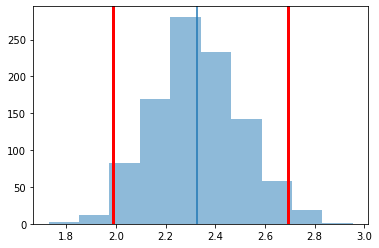

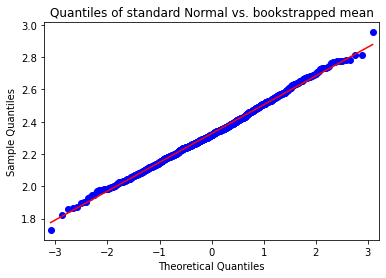

In [15]:
n_replicas = 1000

diffs = []
for i in range(n_replicas):
 sample = CompactSmoothData.sample(frac=1.0, replace=True)
 malignent_sample_mean = sample[sample.diagnosis == True].smoothness_mean.mean()
 benign_sample_mean = sample[sample.diagnosis == False].smoothness_mean.mean()
 diffs.append(malignent_sample_mean - benign_sample_mean)

diffs = pd.Series(diffs)
print('Smoothness mean diffrence')
plot_hist(diffs)


fig = sm.qqplot(diffs, line='s')
plt.title('Quantiles of standard Normal vs. bookstrapped mean')
plt.show()


Compactness mean diffrence


/Users/michael/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


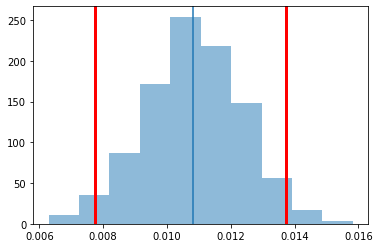

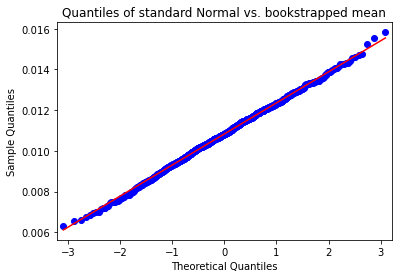

In [16]:
diffs = []
for i in range(n_replicas):
 sample = CompactSmoothData.sample(frac=1.0, replace=True)
 malignent_sample_mean = sample[sample.diagnosis == True].compactness_mean.mean()
 benign_sample_mean = sample[sample.diagnosis == False].compactness_mean.mean()
 diffs.append(malignent_sample_mean - benign_sample_mean)

diffs = pd.Series(diffs)
print('Compactness mean diffrence')
plot_hist(diffs)


fig = sm.qqplot(diffs, line='s')
plt.title('Quantiles of standard Normal vs. bookstrapped mean')
plt.show()

In [17]:
# After bootstrapping we see no overlap in the distribution of means between Malingnant and Benign diagnosis for compactness and smoothness.
# The diffrences distribute away from zero, and the bootstrap distribution of the difference in means does conform to the CLT
# So with confidence we can conclude the means signifigantly differ between the Malingnant and Benign samples

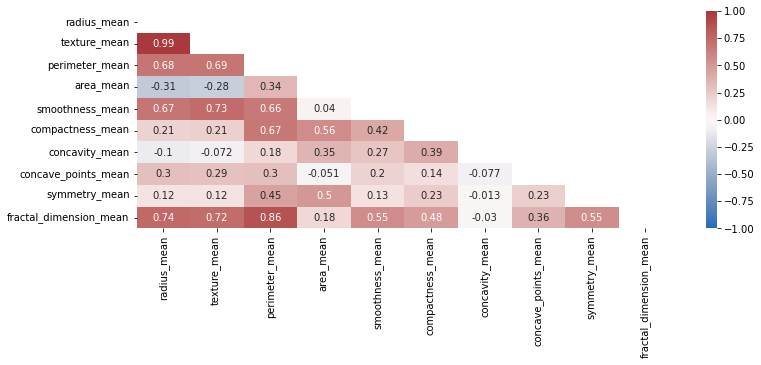

In [18]:
#data.head(2)

meanData = data[['ID', 'diagnosis','radius_mean',
                      'texture_mean', 'perimeter_mean', 'area_mean',
                      'smoothness_mean', 'compactness_mean', 'concavity_mean',
                      'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

X = meanData.iloc[:,2:12]


corrMatrix = X.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 4))
sb.heatmap(corrMatrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)


plt.show()

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pcaData = meanData.iloc[:,2:12]
target = meanData['diagnosis'].to_numpy()
#pcaData.head(2)
#standardise the data for PCA
df_st =  StandardScaler().fit_transform(pcaData)  
pd.DataFrame(df_st, columns=pcaData.columns).head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,0.984375,2.652874,2.255747,2.833031,1.316862,1.148757,-1.359293,1.307686,2.296076
1,1.829821,1.908708,-0.023846,-0.868652,0.263327,-0.692926,-0.805450,-0.369203,-0.375612,1.087084


In [20]:
pca_out = PCA().fit(df_st)

# get the component variance
pca_out.explained_variance_ratio_

array([0.44750234, 0.21978991, 0.12710193, 0.08054407, 0.0543889 ,
       0.03262496, 0.01733396, 0.01146134, 0.00846539, 0.0007872 ])

In [21]:
# Cumulative proportion of variance
np.cumsum(pca_out.explained_variance_ratio_)

array([0.44750234, 0.66729225, 0.79439418, 0.87493825, 0.92932715,
       0.96195211, 0.97928607, 0.99074741, 0.9992128 , 1.        ])

In [22]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = pcaData.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
radius_mean,0.394485,-0.339496,0.071968,-0.102610,0.022502,-0.166872,-0.143166,0.385746,-0.124322,-0.707326
texture_mean,0.398733,-0.324988,0.103668,-0.102823,0.067381,-0.038342,-0.161964,0.447057,-0.014172,0.694097
perimeter_mean,0.440817,0.129878,-0.001424,-0.078264,-0.148923,-0.117858,-0.254267,-0.315162,0.762428,-0.036630
area_mean,0.079240,0.615885,-0.119379,-0.105056,-0.083942,0.312130,-0.609337,0.238180,-0.236075,-0.029909
smoothness_mean,0.370381,-0.058100,0.340936,0.006396,0.218224,0.762584,0.219881,-0.237297,-0.070394,-0.066297
compactness_mean,0.278414,0.392367,0.202475,0.098890,-0.598856,-0.104264,0.529098,0.251217,-0.069076,0.020805
concavity_mean,0.061479,0.364543,0.571948,0.281859,0.538137,-0.403628,-0.049708,-0.001401,-0.041811,0.005611
concave_points_mean,0.193137,-0.085455,-0.348829,0.904163,-0.011263,0.085784,-0.086663,0.033555,-0.008972,-0.001105
symmetry_mean,0.208477,0.292190,-0.563537,-0.193025,0.517982,-0.014566,0.421630,0.223699,0.139805,-0.021310


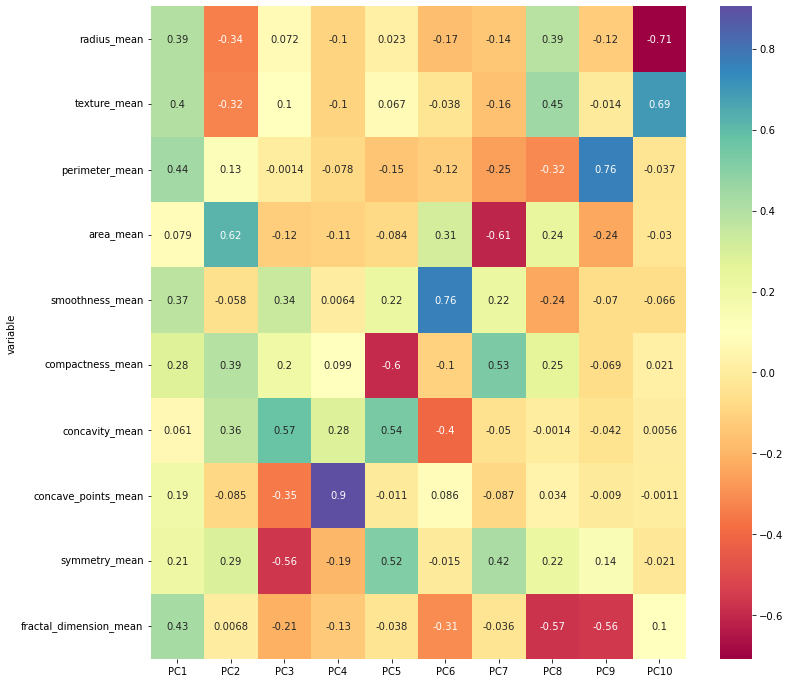

In [23]:
# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs.
fig, ax = plt.subplots(figsize=(12, 12))
ax = sb.heatmap(loadings_df, annot=True, cmap='Spectral' )
plt.show()

In [24]:
# get eigenvalues (variance explained by each PC)  
pca_out.explained_variance_

array([4.48290192, 2.20176867, 1.27325698, 0.80685875, 0.54484657,
       0.32682399, 0.17364481, 0.11481515, 0.08480289, 0.00788591])

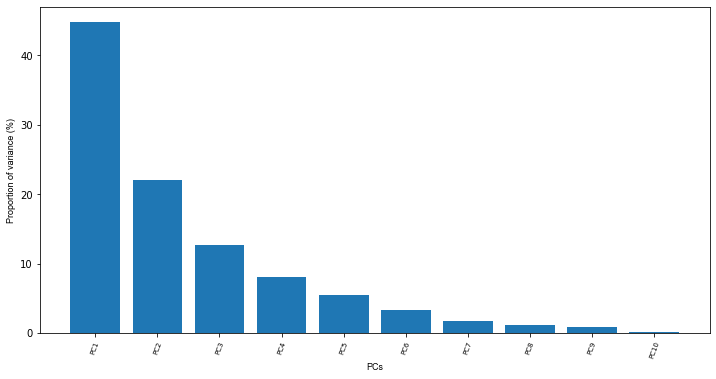

In [25]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_],show=True, dim=(12,6))


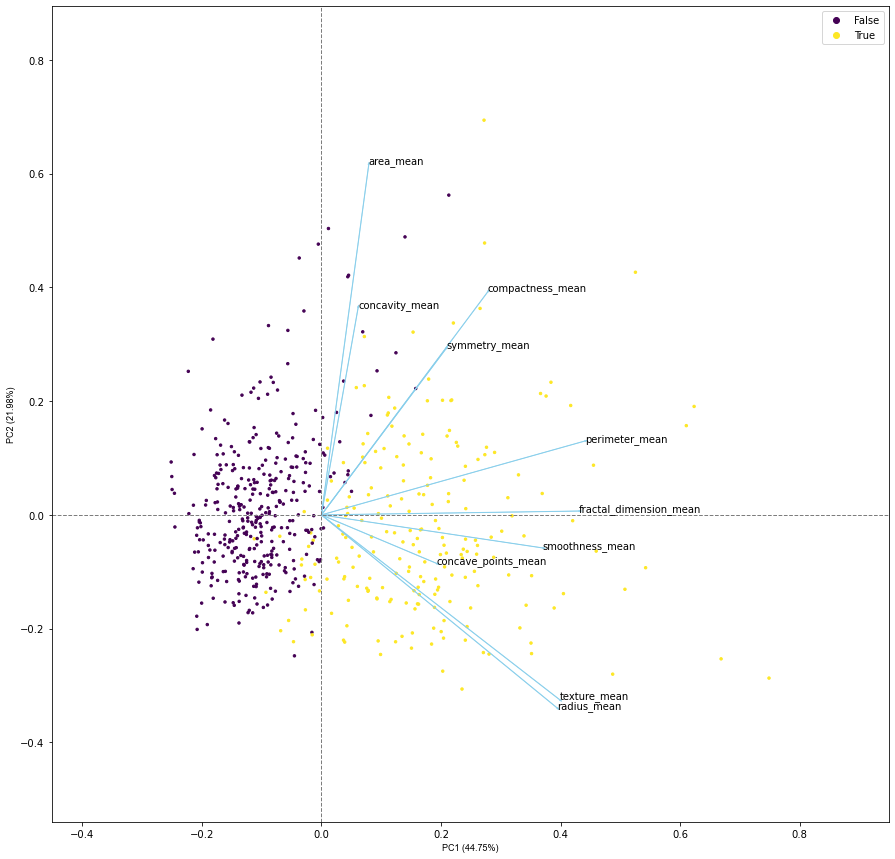

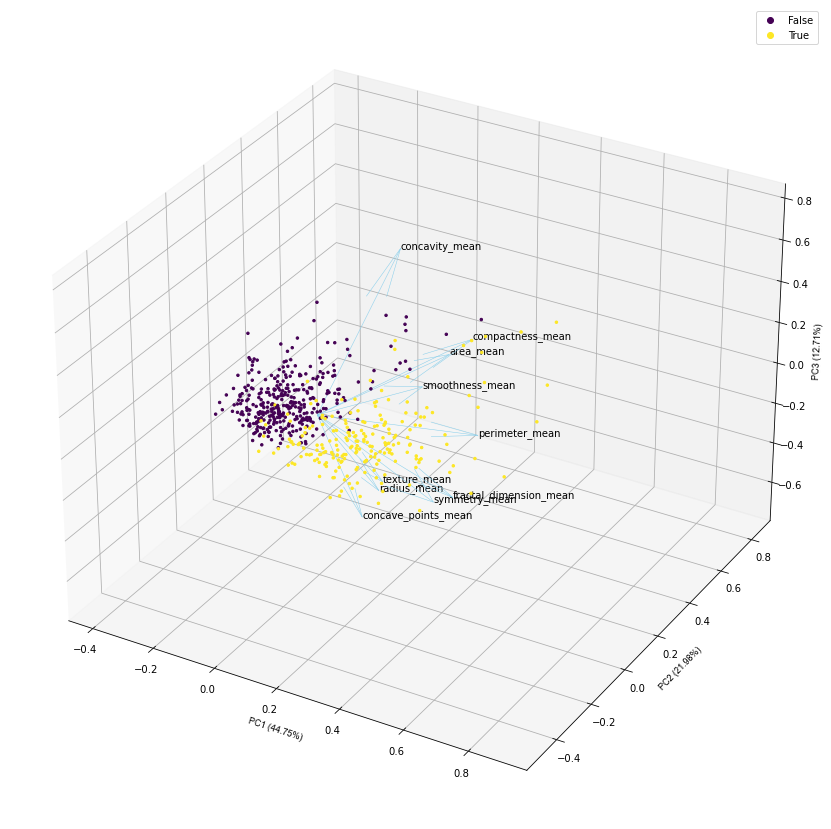

In [26]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=pcaData.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2),show=True,dim=(15,15), colorlist=target)
    
# get 3D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=pcaData.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
    var3=round(pca_out.explained_variance_ratio_[2]*100, 2), show=True,dim=(15,15), colorlist=target)

In [27]:
#The first 3 principle components account for ~80% of the variance of the data set. Based on the correlation matrix 
# of the PC vs the variables, I would select perimeter_mean, area_mean and concavity_mean as my prediction variables


# Model 1 - logistic regression model - Previous PCA is used to minimise overfitting by reducing the number of
#predictors to use

import statsmodels.api as sm 
# get independent variables
X = meanData[['perimeter_mean',  'area_mean', 'concavity_mean']]
# to get intercept -- this is optional
# X = sm.add_constant(X)
# get response variables
Y = meanData[['diagnosis']]
# fit the model with maximum likelihood function

#cast data type to float for X data frame
X = X.astype(float)
#np.asarray(X)

model = sm.Logit(endog=Y, exog=X).fit()
# output message

Optimization terminated successfully.
         Current function value: 0.290520
         Iterations 8


In [28]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Tue, 12 Apr 2022   Pseudo R-squ.:                  0.5600
Time:                        23:29:36   Log-Likelihood:                -165.31
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 4.153e-92
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
perimeter_mean    44.3476      3.653     12.139      0.000      37.187      51.508
area_mean        -60.1469      7.777     -7.734      0.000     -75.389     -44.905
concavity_mean   -39.7353     20.446

In [29]:
# get odds ratio
np.exp(model.params)

perimeter_mean    1.819358e+19
area_mean         7.559955e-27
concavity_mean    5.535597e-18
dtype: float64

In [30]:
pred = model.predict(exog=X)
round(pred)
pred.head()


0    0.999378
1    0.473364
2    0.985963
3    0.922397
4    0.989488
dtype: float64

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_true=list(meanData['diagnosis']), y_pred=list(round(pred)))
# output

array([[338,  19],
       [ 42, 170]])

In [32]:
# fitted model accuracy
accuracy_score(y_true=list(meanData['diagnosis']), y_pred=list(round(pred)))

0.8927943760984183

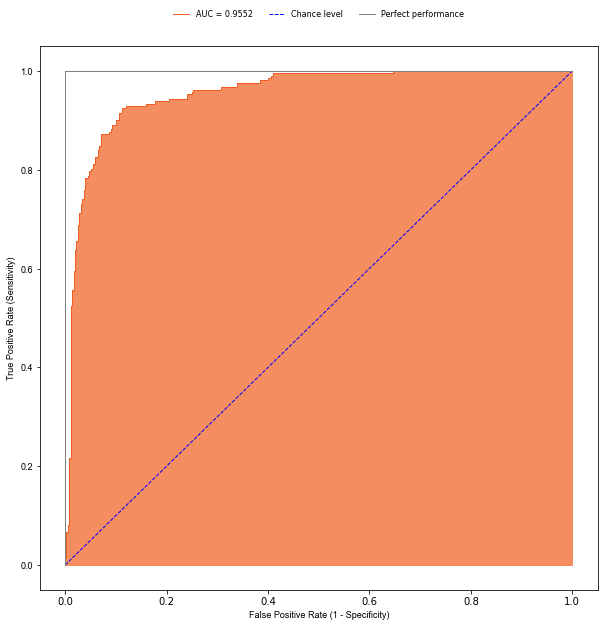

In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bioinfokit.visuz import stat

fpr, tpr, thresholds = roc_curve(y_true=list(meanData['diagnosis']), y_score=list(pred))
auc = roc_auc_score(y_true=list(meanData['diagnosis']), y_score=list(pred))

# plot ROC
stat.roc(fpr=fpr, tpr=tpr, auc=auc, shade_auc=True, per_class=True, 
         legendpos='upper center', legendanchor=(0.5, 1.08), legendcols=3, show=True, dim=(10,10))

In [34]:
#Model 2 - Support Vector Machine model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

svmData = meanData
#svmData['diagnosis'] = svmData['diagnosis'].astype('category')
#svmData.info()

X = svmData.iloc[:,2:12]
Y = svmData['diagnosis']

# split the dataset into 70% as training and 30% as testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# random_state parameter ensures that the train_test_split function will reproduce the same train and testing
# dataset every time. Set random_state to any integer.



In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut

#print(type(y_train))

svm = SVC(C=1, kernel='linear', random_state=1)

#y_pred

#create the Cross validation object - accounts for overfitting in SVM model - disabled as slow to run
#loo = LeaveOneOut()

#calculate cross validated accuracy score with 10 iterations
scores = cross_val_score(svm, X,Y, cv = 10, scoring='accuracy')
svm.fit(X=X_train, y=y_train)

y_pred = svm.predict(X=X_test)

print( scores.mean() )

0.9349937343358397


In [36]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[105,   3],
       [  4,  59]])

In [37]:
# fitted SVM model accuracy
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9590643274853801

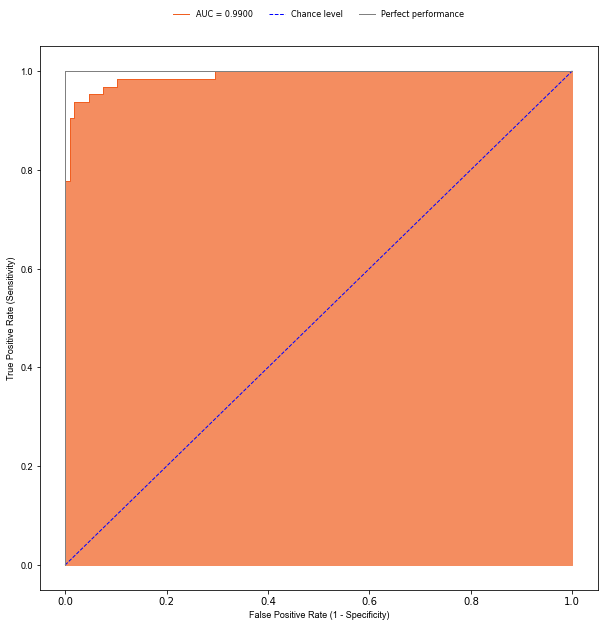

In [38]:
y_score = svm.decision_function(X=X_test)
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)
auc = roc_auc_score(y_true=y_test, y_score=y_score)
# plot ROC
stat.roc(fpr=fpr, tpr=tpr, auc=auc, shade_auc=True, per_class=True, legendpos='upper center', legendanchor=(0.5, 1.08), 
         legendcols=3, show=True,dim=(10,10))

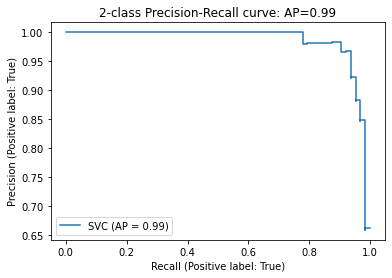

In [39]:
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve
average_precision = average_precision_score(y_true=y_test, y_score=y_score)

# plot AUPRC
disp = plot_precision_recall_curve(estimator=svm, X=X_test, y=y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
plt.show()

<AxesSubplot:>

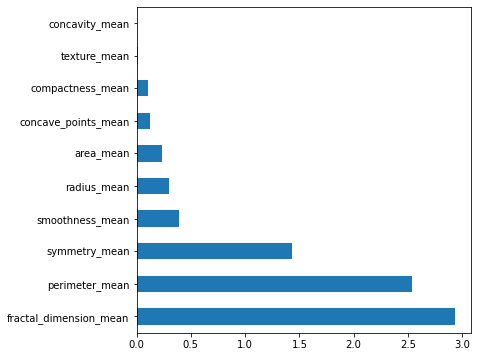

In [40]:
#crude feature ranking of SVM model based on co-efficent
pd.Series(abs(svm.coef_[0]), index=X.columns).nlargest(20).plot(kind='barh',figsize=(6, 6))

In [41]:
#################################################################################
#
#
#
#Part 2
#
#
#
#################################################################################

In [42]:
# Data set URL string to be used by both code sets in debug/assessment
fileLoc = 'https://gist.github.com/jeff-boykin/9e1a450ef152604e6830ce70f4fc1be8/raw/4d42aebc2c2d3f7528a7769248720918e14f2e03/part-2-data.train.csv'

In [43]:
#!/usr/bin/env python

import pandas as pd
import numpy as np

#from sklearn import LinearRegression   <====This will throw an error, correct call on next line
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import cross_val_score <== sub module name depreciated, correct call on next line
from sklearn.model_selection import cross_val_score 

# Load data
#d = pd.read_csv('../data/train.csv')
#Using URL to make it easier for others to run code wthout additional setup of enviroment
d = pd.read_csv(fileLoc)

#Good to check data set for non nulls and data typing to determine possible transformation requirements 
#with the Pandas data frame info() function
#d.info()



# Setup data for prediction
#x1 = data.SalaryNormalized   <=== There is no data frame called data, use d instead
x1 = d.SalaryNormalized   #to make it more clear mathamaticly, would refrence this as y, the dependent variable
#x2 = pd.get_dummies(data.ContractType) <=== There is no data frame called data, use d instead
x2 = pd.get_dummies(d.ContractType)  #this x2, could simply refered to as x



# Setup model
model = LinearRegression()

# Evaluate model
#from sklearn.cross_validation import cross_val_score   <===== No need to import again
#from sklearn.cross_validation import train_test_split  <== depreciated, new method below
from sklearn.model_selection import train_test_split #<== This library is not used by this code, but would be good to use

#scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') no correct scorer refrence
#for more details see https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
# CV iteration should be greater > 1, recommend using 10, 5 is the default without specifying
scores = cross_val_score(model, x2, x1, cv=10, scoring='neg_mean_absolute_error')
print(scores.mean())



-11710.926278050934


In [44]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import cross_val_score  <== depreciated, new method below
from sklearn.model_selection import cross_val_score 

# Load data
#data = pd.read_csv('../data/train.csv')
#Using URL to make it easier for others to run code wthout additional setup of enviroment
data = pd.read_csv(fileLoc)

#Good to check data set for non nulls and data typing to determine possible transformation requirements 
#with the Pandas data frame info() function
#d.info()

# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
#scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error') no correct scorer refrence
#for more details see https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
# For CV iteration recommend using 10, 5 is the default without specifying it
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())

-11822.140231295067
